In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import random
from IPython.display import IFrame

In [2]:
import config

In [3]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [5]:
fetch = pd.read_csv("library_3366rows.csv")

In [6]:
fetch.describe()

popularity  danceability       energy          key     loudness  \
count  3366.000000   3366.000000  3366.000000  3366.000000  3366.000000   
mean     62.619133      0.622207     0.561327     5.297980    -9.877750   
std      18.598884      0.162957     0.284895     3.617775     7.222636   
min       0.000000      0.107000     0.002900     0.000000   -40.436000   
25%      55.000000      0.508000     0.334250     2.000000   -12.151000   
50%      68.000000      0.634000     0.630000     5.000000    -7.108000   
75%      75.000000      0.747000     0.798000     8.000000    -5.006000   
max     100.000000      0.975000     0.996000    11.000000    -0.517000   

              mode  acousticness  instrumentalness     liveness      valence  \
count  3366.000000   3366.000000       3366.000000  3366.000000  3366.000000   
mean      0.613191      0.340301          0.247896     0.172365     0.445314   
std       0.487092      0.365899          0.391199     0.139933     0.253968   
min       0.000000      0.000005          0.000000     0.024400     0.033800   
25%       0.000000      0.027500          0.000000     0.093900     0.225000   
50%       1.000000      0.165000          0.000032     0.115000     0.430000   
75%       1.000000      0.694000          0.740500     0.202000     0.648000   
max       1.000000      0.996000          0.977000     0.960000     0.978000   

             tempo    duration_ms  time_signature  
count  3366.000000    3366.000000     3366.000000  
mean    118.979237  205539.008318        3.907011  
std      28.990452   64131.790248        0.397576  
min      40.001000   41757.000000        1.000000  
25%      96.038000  160000.000000        4.000000  
50%     119.994500  198980.500000        4.000000  
75%     138.181500  237275.000000        4.000000  
max     210.164000  578041.000000        5.000000

In [7]:
fetch

id                              title   all_artists  \
0     6ziqWx82jgkQYhyIALoraH   Transmission - Joris Voorn Remix   Joris Voorn   
1     62piGIpUTsY8HA7tdjfLS8                           Electric      SANDHAUS   
2     2QlUkqLbDDxDpiMcW7OJrZ  Dreaming - Casper Cole Remix Edit   Casper Cole   
3     77FpsyFq4vGchrHovA8EyU                              Lissu         Wassu   
4     3YDBOFmBEk19AS4t4gwpXq                            Arrival      Einmusik   
...                      ...                                ...           ...   
3361  5FvxRvrQ8qzKjBJ6ST9aiu   My Universe - David Guetta Remix  David Guetta   
3362  2giNwwft9s8E5Or8N0olgc                 Skit: Expectation!           BTS   
3363  6Lgbf4b6c9fwz24eFEWONX      My Universe - Supernova 7 Mix           BTS   
3364  53XrsilgguJmmsEtDsj0yY               Skit: R U Happy Now?           BTS   
3365  4Ut6UU8Yyihz1jCZWSCQpu             Skit: Circle Room Talk           BTS   

      popularity release_date  danceability  energy  key  loudness  mode  \
0             62   2022-10-28         0.711   0.838    2    -7.985     1   
1             49   2022-11-25         0.746   0.749   11   -10.482     0   
2             17   2022-10-07         0.544   0.872    5    -7.444     0   
3             27   2023-01-13         0.753   0.915    4    -8.609     0   
4             31   2022-11-11         0.685   0.810    2    -8.179     1   
...          ...          ...           ...     ...  ...       ...   ...   
3361          51   2021-10-13         0.436   0.948    1    -5.515     0   
3362          43   2015-04-29         0.635   0.167    9   -21.117     0   
3363          43   2021-09-27         0.665   0.712    6    -6.841     0   
3364          47   2013-09-11         0.535   0.382    1   -18.760     1   
3365          48   2013-06-12         0.598   0.356    9   -18.009     1   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0          0.29200          0.927000    0.1460   0.2230  124.002       224274   
1          0.00567          0.366000    0.2280   0.0342  123.988       178064   
2          0.00794          0.877000    0.1180   0.1820  123.033       265366   
3          0.00104          0.883000    0.0608   0.1040  120.008       233662   
4          0.00020          0.899000    0.0900   0.0869  123.994       435322   
...            ...               ...       ...      ...      ...          ...   
3361       0.09740          0.003750    0.1400   0.6960  122.609       199136   
3362       0.89300          0.000000    0.5010   0.7120  100.544       147694   
3363       0.00115          0.000187    0.2700   0.4890  105.017       279318   
3364       0.85200          0.000000    0.3110   0.6090   86.969       148073   
3365       0.91200          0.000000    0.9130   0.8170  121.045       131907   

      time_signature  
0                  4  
1                  4  
2                  4  
3                  4  
4                  4  
...              ...  
3361               4  
3362               3  
3363               4  
3364               4  
3365               3  

[3366 rows x 17 columns]

In [8]:
duplicateRows = fetch[fetch.duplicated()]
duplicateRows

id                                    title  \
475   5sNESr6pQfIhL3krM8CtZn                            Numb / Encore   
552   1bDbXMyjaUIooNwFE9wn0N                                Rich Flex   
572   0yLdNVWF3Srea0uzk55zFn                                  Flowers   
573   1Qrg8KqiBpW07V7PNxwwwL                                Kill Bill   
574   4nrPB8O7Y7wsOCJdgXkthe    Shakira: Bzrp Music Sessions, Vol. 53   
...                      ...                                      ...   
2202  3vZO25GdYuqFrR1kzZADnp                             Ready or Not   
2207  5Tbpp3OLLClPJF8t1DmrFD                  Nuthin' But A "G" Thang   
3086  2K9kZpwD2CzTa6iiSYYOoO                                     Leão   
3150  0mBP9X2gPCuapvpZ7TGDk3  Left and Right (Feat. Jung Kook of BTS)   
3359  1DlczmjByrS4qxRVfGjpqN             My Universe - Galantis Remix   

           all_artists  popularity release_date  danceability  energy  key  \
475        Linkin Park          75   2004-11-30         0.687   0.793    2   
552          21 Savage          90   2022-11-04         0.561   0.520   11   
572        Miley Cyrus         100   2023-01-13         0.707   0.681    0   
573                SZA          91   2022-12-08         0.644   0.735    8   
574            Shakira          96   2023-01-11         0.778   0.632    2   
...                ...         ...          ...           ...     ...  ...   
2202              Pras          69   1996-02-13         0.607   0.422   10   
2207        Snoop Dogg          69   1992-12-15         0.669   0.821   11   
3086  Marília Mendonça          87   2022-12-09         0.743   0.865    6   
3150               BTS          80   2022-06-24         0.881   0.592    2   
3359          Galantis          59   2021-10-11         0.596   0.915    4   

      loudness  mode  acousticness  instrumentalness  liveness  valence  \
475     -4.254     1       0.06030          0.000000    0.5820    0.751   
552     -9.342     0       0.05030          0.000002    0.3550    0.424   
572     -4.325     1       0.06320          0.000005    0.0322    0.646   
573     -5.747     1       0.05210          0.144000    0.1610    0.418   
574     -5.600     0       0.27400          0.000000    0.0915    0.498   
...        ...   ...           ...               ...       ...      ...   
2202   -13.364     0       0.20900          0.000000    0.0839    0.563   
2207    -4.370     0       0.00182          0.000000    0.1470    0.684   
3086    -3.897     1       0.44900          0.000003    0.2970    0.794   
3150    -4.898     1       0.61900          0.000013    0.0901    0.719   
3359    -4.711     1       0.09490          0.000002    0.1200    0.629   

        tempo  duration_ms  time_signature  
475   107.045       205733               4  
552   153.150       239360               3  
572   117.999       200455               4  
573    88.980       153947               4  
574   122.104       218289               4  
...       ...          ...             ...  
2202  130.470       226987               3  
2207   94.895       237573               4  
3086  129.999       166775               4  
3150  101.058       154487               4  
3359  120.024       224908               4  

[352 rows x 17 columns]

In [9]:
fetch.drop_duplicates(subset=None, keep='first', inplace=True)

## scaling prep

In [10]:
df = fetch.select_dtypes(include=np.number)
df

popularity  danceability  energy  key  loudness  mode  acousticness  \
0             62         0.711   0.838    2    -7.985     1       0.29200   
1             49         0.746   0.749   11   -10.482     0       0.00567   
2             17         0.544   0.872    5    -7.444     0       0.00794   
3             27         0.753   0.915    4    -8.609     0       0.00104   
4             31         0.685   0.810    2    -8.179     1       0.00020   
...          ...           ...     ...  ...       ...   ...           ...   
3361          51         0.436   0.948    1    -5.515     0       0.09740   
3362          43         0.635   0.167    9   -21.117     0       0.89300   
3363          43         0.665   0.712    6    -6.841     0       0.00115   
3364          47         0.535   0.382    1   -18.760     1       0.85200   
3365          48         0.598   0.356    9   -18.009     1       0.91200   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.927000    0.1460   0.2230  124.002       224274   
1             0.366000    0.2280   0.0342  123.988       178064   
2             0.877000    0.1180   0.1820  123.033       265366   
3             0.883000    0.0608   0.1040  120.008       233662   
4             0.899000    0.0900   0.0869  123.994       435322   
...                ...       ...      ...      ...          ...   
3361          0.003750    0.1400   0.6960  122.609       199136   
3362          0.000000    0.5010   0.7120  100.544       147694   
3363          0.000187    0.2700   0.4890  105.017       279318   
3364          0.000000    0.3110   0.6090   86.969       148073   
3365          0.000000    0.9130   0.8170  121.045       131907   

      time_signature  
0                  4  
1                  4  
2                  4  
3                  4  
4                  4  
...              ...  
3361               4  
3362               3  
3363               4  
3364               4  
3365               3  

[3014 rows x 13 columns]

In [11]:
df.drop('popularity', axis=1, inplace=True)
df

danceability  energy  key  loudness  mode  acousticness  \
0            0.711   0.838    2    -7.985     1       0.29200   
1            0.746   0.749   11   -10.482     0       0.00567   
2            0.544   0.872    5    -7.444     0       0.00794   
3            0.753   0.915    4    -8.609     0       0.00104   
4            0.685   0.810    2    -8.179     1       0.00020   
...            ...     ...  ...       ...   ...           ...   
3361         0.436   0.948    1    -5.515     0       0.09740   
3362         0.635   0.167    9   -21.117     0       0.89300   
3363         0.665   0.712    6    -6.841     0       0.00115   
3364         0.535   0.382    1   -18.760     1       0.85200   
3365         0.598   0.356    9   -18.009     1       0.91200   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.927000    0.1460   0.2230  124.002       224274   
1             0.366000    0.2280   0.0342  123.988       178064   
2             0.877000    0.1180   0.1820  123.033       265366   
3             0.883000    0.0608   0.1040  120.008       233662   
4             0.899000    0.0900   0.0869  123.994       435322   
...                ...       ...      ...      ...          ...   
3361          0.003750    0.1400   0.6960  122.609       199136   
3362          0.000000    0.5010   0.7120  100.544       147694   
3363          0.000187    0.2700   0.4890  105.017       279318   
3364          0.000000    0.3110   0.6090   86.969       148073   
3365          0.000000    0.9130   0.8170  121.045       131907   

      time_signature  
0                  4  
1                  4  
2                  4  
3                  4  
4                  4  
...              ...  
3361               4  
3362               3  
3363               4  
3364               4  
3365               3  

[3014 rows x 12 columns]

## scaling

In [12]:
scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)
X_scaled_df = pd.DataFrame(X_scaled, columns = df.columns)
display(df.head())
print()
display(X_scaled_df.head())

danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.711   0.838    2    -7.985     1       0.29200             0.927   
1         0.746   0.749   11   -10.482     0       0.00567             0.366   
2         0.544   0.872    5    -7.444     0       0.00794             0.877   
3         0.753   0.915    4    -8.609     0       0.00104             0.883   
4         0.685   0.810    2    -8.179     1       0.00020             0.899   

   liveness  valence    tempo  duration_ms  time_signature  
0    0.1460   0.2230  124.002       224274               4  
1    0.2280   0.0342  123.988       178064               4  
2    0.1180   0.1820  123.033       265366               4  
3    0.0608   0.1040  120.008       233662               4  
4    0.0900   0.0869  123.994       435322               4

danceability    energy       key  loudness      mode  acousticness  \
0      0.555006  1.000686 -0.905065  0.307726  0.795993     -0.180622   
1      0.768562  0.695290  1.588161 -0.026553 -1.256293     -0.944300   
2     -0.463960  1.117355 -0.073990  0.380151 -1.256293     -0.938245   
3      0.811273  1.264906 -0.351015  0.224190 -1.256293     -0.956649   
4      0.396365  0.904607 -0.905065  0.281755  0.795993     -0.958889   

   instrumentalness  liveness   valence     tempo  duration_ms  time_signature  
0          1.614257 -0.180952 -0.829171  0.183411     0.319202        0.236985  
1          0.225070  0.403730 -1.572915  0.182930    -0.390785        0.236985  
2          1.490443 -0.380599 -0.990683  0.150130     0.950553        0.236985  
3          1.505301 -0.788451 -1.297950  0.046234     0.463442        0.236985  
4          1.544921 -0.580247 -1.365313  0.183136     3.561816        0.236985

## Clustering with K-Means

In [13]:
kmeans = KMeans(n_clusters=13, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=13, random_state=1234)

In [14]:
kmeans.labels_

array([ 8,  7,  0, ...,  7,  6, 12], dtype=int32)

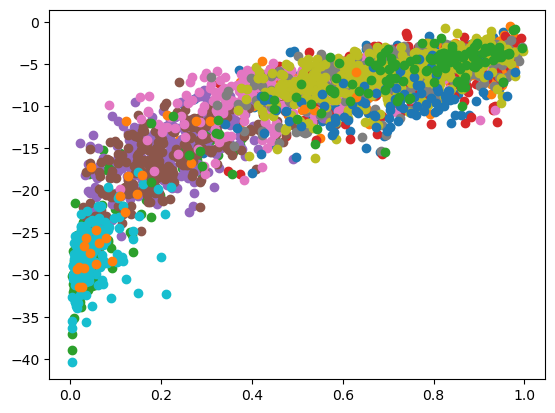

In [15]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df.to_numpy()[row_ix, 1], df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [16]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     342
1     246
2     143
3     391
4     225
5     234
6     253
7     318
8     421
9     188
10     88
11     29
12    136
dtype: int64

In [17]:
#X_df = pd.DataFrame(X)
df["cluster"] = clusters
df

danceability  energy  key  loudness  mode  acousticness  \
0            0.711   0.838    2    -7.985     1       0.29200   
1            0.746   0.749   11   -10.482     0       0.00567   
2            0.544   0.872    5    -7.444     0       0.00794   
3            0.753   0.915    4    -8.609     0       0.00104   
4            0.685   0.810    2    -8.179     1       0.00020   
...            ...     ...  ...       ...   ...           ...   
3361         0.436   0.948    1    -5.515     0       0.09740   
3362         0.635   0.167    9   -21.117     0       0.89300   
3363         0.665   0.712    6    -6.841     0       0.00115   
3364         0.535   0.382    1   -18.760     1       0.85200   
3365         0.598   0.356    9   -18.009     1       0.91200   

      instrumentalness  liveness  valence    tempo  duration_ms  \
0             0.927000    0.1460   0.2230  124.002       224274   
1             0.366000    0.2280   0.0342  123.988       178064   
2             0.877000    0.1180   0.1820  123.033       265366   
3             0.883000    0.0608   0.1040  120.008       233662   
4             0.899000    0.0900   0.0869  123.994       435322   
...                ...       ...      ...      ...          ...   
3361          0.003750    0.1400   0.6960  122.609       199136   
3362          0.000000    0.5010   0.7120  100.544       147694   
3363          0.000187    0.2700   0.4890  105.017       279318   
3364          0.000000    0.3110   0.6090   86.969       148073   
3365          0.000000    0.9130   0.8170  121.045       131907   

      time_signature  cluster  
0                  4        8  
1                  4        7  
2                  4        0  
3                  4        0  
4                  4       10  
...              ...      ...  
3361               4        0  
3362               3        2  
3363               4        7  
3364               4        6  
3365               3       12  

[3014 rows x 13 columns]

In [18]:
add_df = pd.DataFrame(data=fetch,columns=['id','title','all_artists','popularity','release_date'])

merge = [df,add_df]
df = pd.concat(merge,axis=1)
df = df[['id',
        'title',
        'all_artists',
        'popularity',
        'release_date',
        'danceability',
        'energy',
        'key',
        'loudness',
        'mode',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo',
        'duration_ms',
        'time_signature',
        'cluster']]
df

id                              title   all_artists  \
0     6ziqWx82jgkQYhyIALoraH   Transmission - Joris Voorn Remix   Joris Voorn   
1     62piGIpUTsY8HA7tdjfLS8                           Electric      SANDHAUS   
2     2QlUkqLbDDxDpiMcW7OJrZ  Dreaming - Casper Cole Remix Edit   Casper Cole   
3     77FpsyFq4vGchrHovA8EyU                              Lissu         Wassu   
4     3YDBOFmBEk19AS4t4gwpXq                            Arrival      Einmusik   
...                      ...                                ...           ...   
3361  5FvxRvrQ8qzKjBJ6ST9aiu   My Universe - David Guetta Remix  David Guetta   
3362  2giNwwft9s8E5Or8N0olgc                 Skit: Expectation!           BTS   
3363  6Lgbf4b6c9fwz24eFEWONX      My Universe - Supernova 7 Mix           BTS   
3364  53XrsilgguJmmsEtDsj0yY               Skit: R U Happy Now?           BTS   
3365  4Ut6UU8Yyihz1jCZWSCQpu             Skit: Circle Room Talk           BTS   

      popularity release_date  danceability  energy  key  loudness  mode  \
0             62   2022-10-28         0.711   0.838    2    -7.985     1   
1             49   2022-11-25         0.746   0.749   11   -10.482     0   
2             17   2022-10-07         0.544   0.872    5    -7.444     0   
3             27   2023-01-13         0.753   0.915    4    -8.609     0   
4             31   2022-11-11         0.685   0.810    2    -8.179     1   
...          ...          ...           ...     ...  ...       ...   ...   
3361          51   2021-10-13         0.436   0.948    1    -5.515     0   
3362          43   2015-04-29         0.635   0.167    9   -21.117     0   
3363          43   2021-09-27         0.665   0.712    6    -6.841     0   
3364          47   2013-09-11         0.535   0.382    1   -18.760     1   
3365          48   2013-06-12         0.598   0.356    9   -18.009     1   

      acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0          0.29200          0.927000    0.1460   0.2230  124.002       224274   
1          0.00567          0.366000    0.2280   0.0342  123.988       178064   
2          0.00794          0.877000    0.1180   0.1820  123.033       265366   
3          0.00104          0.883000    0.0608   0.1040  120.008       233662   
4          0.00020          0.899000    0.0900   0.0869  123.994       435322   
...            ...               ...       ...      ...      ...          ...   
3361       0.09740          0.003750    0.1400   0.6960  122.609       199136   
3362       0.89300          0.000000    0.5010   0.7120  100.544       147694   
3363       0.00115          0.000187    0.2700   0.4890  105.017       279318   
3364       0.85200          0.000000    0.3110   0.6090   86.969       148073   
3365       0.91200          0.000000    0.9130   0.8170  121.045       131907   

      time_signature  cluster  
0                  4        8  
1                  4        7  
2                  4        0  
3                  4        0  
4                  4       10  
...              ...      ...  
3361               4        0  
3362               3        2  
3363               4        7  
3364               4        6  
3365               3       12  

[3014 rows x 18 columns]

## Playing with the parameters

In [19]:
kmeans.inertia_

13758.041179480238

In [20]:
kmeans2 = KMeans(n_clusters=13,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

14945.769411737707


## Choosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

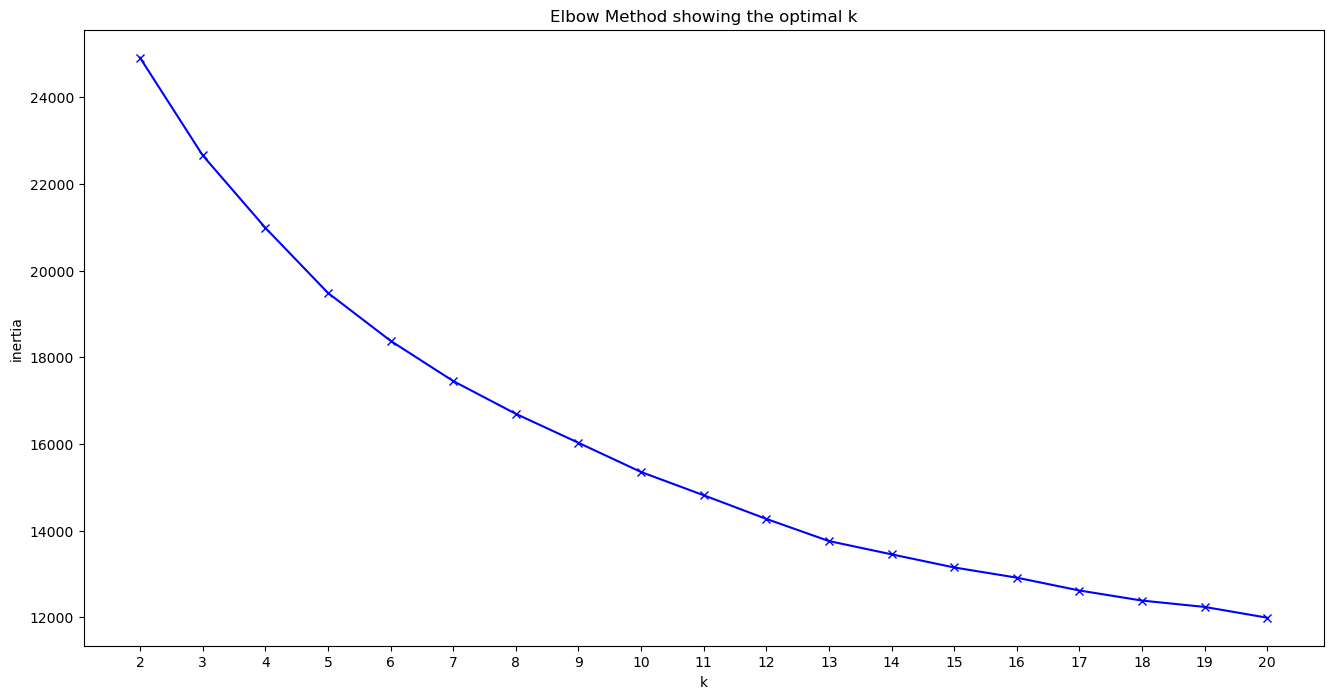

In [21]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

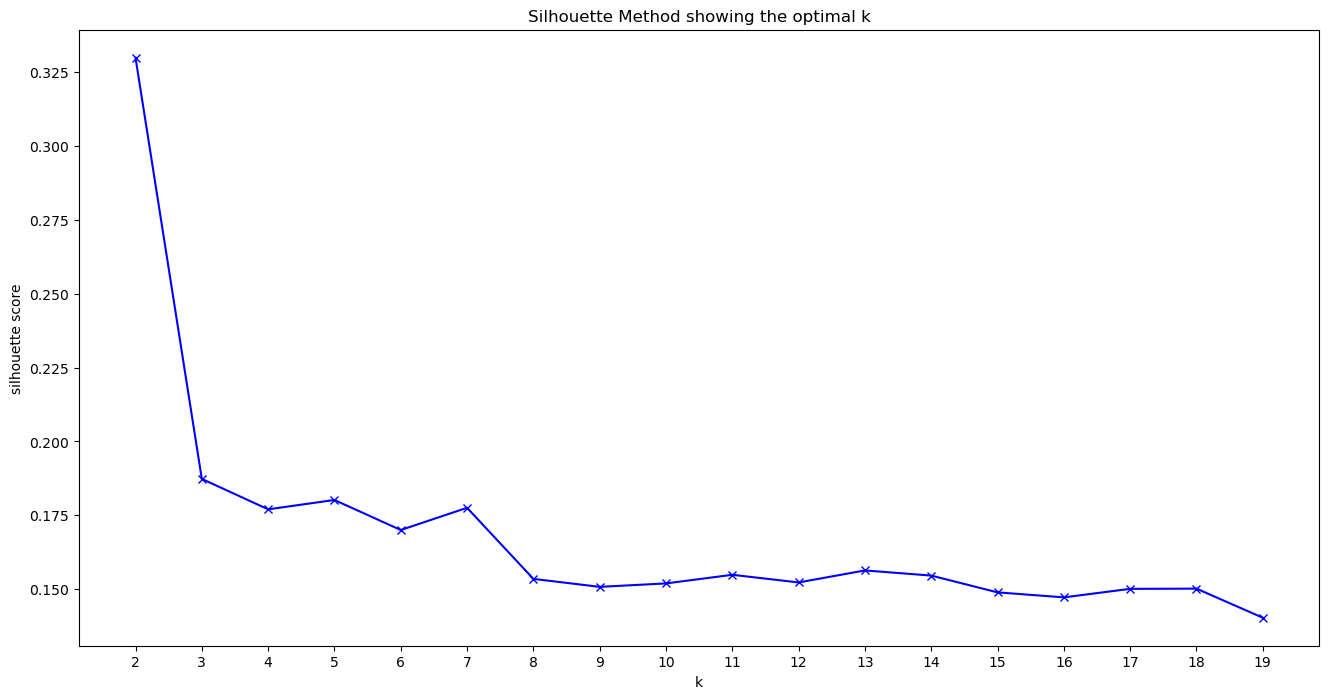

In [22]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## getting user input

In [23]:
import config

In [24]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [25]:
df100 = pd.read_csv('top100.csv')

In [26]:
def ask_input_title(df):
    list_of_songs = list(df['title'].unique())
    list_of_songs = [x.lower() for x in list_of_songs]
    while True:
        prompt = input(f'enter a song title of the Top100: ')
        if (prompt.lower() not in list_of_songs):
            print(f'Your choice is not in the Top100.')
            return [prompt.title(),0]
        else:
            options = df.loc[(df['title'] == prompt.title()),['artist']]
            options = options['artist'].tolist()
            options = [x.lower() for x in options]
            clarification = input(f' Your song might be in the list. Please state which artist you are referring to:')
            if (clarification.lower() not in options):
                print(f' Your combination of song title {prompt.title()} and artist {clarification.title()} is not in the Top 100')
                return [prompt.title(),0]
            else:
                print('Your Song is in the Top100 List :)')
                next_100 = random.choice(list_of_songs)
                while next_100.lower() == prompt.lower():
                    next_100 = random.choice(list_of_songs)
                return [next_100.title(),1]
                    

In [27]:
song_choice = ask_input_title(df100)
song_choice

enter a song title of the Top100: miley cyrus
Your choice is not in the Top100.


['Miley Cyrus', 0]

## getting track_id for input

In [28]:
def create_id(song_title):
    results = sp.search(q=song_choice[0],limit=3)
    track_id=results["tracks"]["items"][0]["id"]
    return track_id
song_id = create_id(song_choice)

In [29]:
if song_choice[1] == 0:
    
else:
    IFrame(src="https://open.spotify.com/embed/track/"+song_id,
                   width="320",
                   height="80",
                   frameborder="0",
                   allowtransparency="true",
                   allow="encrypted-media",
                                              )

IndentationError: expected an indented block (2016766482.py, line 3)

## fetching audio features

In [30]:
def audio_features_df(song):
    features = sp.audio_features(song)
    features_df = pd.DataFrame(data=features)
    features_df = features_df.select_dtypes(include=np.number)
    features_df = features_df[['danceability',
                           'energy',
                           'key',
                           'loudness',
                           'mode',
                           'acousticness',
                           'instrumentalness',
                           'liveness',
                           'valence',
                           'tempo',
                           'duration_ms',
                           'time_signature']]
    return [features,features_df]

In [31]:
afd = audio_features_df(song_id)

## scaling input and getting clusters

In [32]:
 features = afd[0]
features_df = afd[1]
features_df

danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.707   0.681    0    -4.325     1        0.0632          0.000005   

   liveness  valence    tempo  duration_ms  time_signature  
0    0.0322    0.646  117.999       200455               4

add_df = pd.DataFrame(data=features)
add_df = add_df['id']
merge = [add_df,features_df]
features_df = pd.concat(merge,axis=1)
features_df

features_df = features_df[['id',
                           'danceability',
                           'energy',
                           'key',
                           'loudness',
                           'mode',
                           'acousticness',
                           'instrumentalness',
                           'liveness',
                           'valence',
                           'tempo',
                           'duration_ms',
                           'time_signature',
                          'cluster']]
featu

In [33]:
input_scaled = scaler.transform(features_df)
f_scaled_df = pd.DataFrame(input_scaled, columns = features_df.columns)
f_scaled_df

danceability    energy       key  loudness      mode  acousticness  \
0        0.5306  0.461953 -1.459115  0.797699  0.795993      -0.79086   

   instrumentalness  liveness  valence     tempo  duration_ms  time_signature  
0         -0.681231 -0.992376  0.83716 -0.022767    -0.046762        0.236985

In [35]:
clusters_f = kmeans.predict(f_scaled_df)
clusters_f

array([11], dtype=int32)

In [36]:

clusters_f = kmeans.predict(f_scaled_df)
#dataframe creation, concat id with cluster    
pd.Series(clusters_f).value_counts().sort_index()
features_df["cluster"] = clusters_f
features_df

danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.707   0.681    0    -4.325     1        0.0632          0.000005   

   liveness  valence    tempo  duration_ms  time_signature  cluster  
0    0.0322    0.646  117.999       200455               4       11

In [42]:
add_df = pd.DataFrame(data=features)
add_df = add_df['id']
display(add_df)

0    0yLdNVWF3Srea0uzk55zFn
Name: id, dtype: object

In [52]:
merge = [features_df,add_df]
features_df = pd.concat(merge,axis=1)
#features_df.drop('id',axis=1,inplace=True)
features_df

danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.707   0.681    0    -4.325     1        0.0632          0.000005   

   liveness  valence    tempo  duration_ms  time_signature  cluster  \
0    0.0322    0.646  117.999       200455               4       11   

                       id  
0  0yLdNVWF3Srea0uzk55zFn

In [ ]:
#clusters
    pd.Series(clusters_f).value_counts().sort_index()
    features_df["cluster"] = clusters_f
    add_df = pd.DataFrame(data=features)
    add_df = add_df['id']
    merge = [features_df,add_df]
    features_df = pd.concat(merge,axis=1)

    return df

In [ ]:
scale(features)

In [ ]:
features_df

In [ ]:
cluster_value = features_df['cluster'][0]
options = df.loc[(df['cluster'] == cluster_value),['id']]

#options.reset_index(inplace=True)

range_id = options['id'].tolist()
random.choice(range_id)